### Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv("drugs_side_effects_drugs_com.csv")

In [2]:
df.shape

(2931, 17)

In [3]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


### Data Cleaning

### Check for duplicates

In [4]:
print(df.duplicated().any()) 

False


###  Check for Missing Values

In [5]:
print(df.isnull().sum())

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64


In [6]:
### Fill missing categorical fields with placeholders
df['side_effects'] = df['side_effects'].fillna("Unknown")
df['generic_name'] = df['generic_name'].fillna("Unknown")
df['drug_classes'] = df['drug_classes'].fillna("Unknown")
df['brand_names'] = df['brand_names'].fillna("Unknown")
df['pregnancy_category'] = df['pregnancy_category'].fillna("Unknown")
df['alcohol'] = df['alcohol'].fillna("Not Specified")
df['related_drugs'] = df['related_drugs'].fillna("None")

In [7]:
# Fill missing 'rx_otc' with mode
df['rx_otc'] = df['rx_otc'].fillna(df['rx_otc'].mode()[0])

In [8]:
# Fill ratings and review counts with 0 (if keeping all rows)
df['rating'] = df['rating'].fillna(0)
df['no_of_reviews'] = df['no_of_reviews'].fillna(0).astype(int)

In [9]:
# Strip whitespace and lowercase text for consistency
df['drug_name'] = df['drug_name'].str.strip().str.lower()
df['medical_condition'] = df['medical_condition'].str.strip().str.lower()

In [10]:
print(df.isnull().sum())

drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
brand_names                      0
activity                         0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64


In [11]:
import re

# Function to clean text fields
def clean_text_column(col):
    return (
        col.fillna("Unknown")                            # Fill missing
           .str.lower()                                  # Lowercase
           .str.strip()                                  # Strip whitespace
           .str.replace(r'\s*,\s*', ', ', regex=True)    # Normalize commas
           .str.replace(r'\s+', ' ', regex=True)         # Remove extra spaces
           .str.replace(r'[;]+', ',', regex=True)        # Replace semicolons with commas
           .str.replace(r',\s*,+', ', ', regex=True)     # Fix double commas
           .str.replace(r'\s*\(\s*', '(', regex=True)     # Normalize parenthesis spacing
           .str.replace(r'\s*\)\s*', ')', regex=True)
    )

# Clean each column
df['side_effects'] = clean_text_column(df['side_effects'])
df['generic_name'] = clean_text_column(df['generic_name'])
df['drug_classes'] = clean_text_column(df['drug_classes'])
df['brand_names'] = clean_text_column(df['brand_names'])


In [12]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"miscellaneous antimalarials, tetracyclines","acticlate, adoxa ck, adoxa pak, adoxa tt, alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,acne,"hives , difficulty breathing, swelling of your...",spironolactone,"aldosterone receptor antagonists, potassium-sp...","aldactone, carospir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,tetracyclines,"dynacin, minocin, minolira, solodyn, ximino, v...",48%,Rx,D,N,Not Specified,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,accutane,acne,"problems with your vision or hearing, muscle o...",isotretinoin(oral),"miscellaneous antineoplastics, miscellaneous u...",unknown,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,acne,"hives , difficult breathing, swelling of your ...",clindamycin topical,"topical acne agents, vaginal anti-infectives","cleocin t, clindacin etz, clindacin p, clindag...",39%,Rx,B,N,Not Specified,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [13]:
df.dtypes

drug_name                         object
medical_condition                 object
side_effects                      object
generic_name                      object
drug_classes                      object
brand_names                       object
activity                          object
rx_otc                            object
pregnancy_category                object
csa                               object
alcohol                           object
related_drugs                     object
medical_condition_description     object
rating                           float64
no_of_reviews                      int32
drug_link                         object
medical_condition_url             object
dtype: object

### Conversion of the datatypes

In [14]:
# Convert to 'category' where values are limited and repeated
category_cols = [
    'rx_otc', 'pregnancy_category', 'csa', 'alcohol'
]
for col in category_cols:
    df[col] = df[col].astype('category')

# Convert text-heavy columns to 'string' (for NLP or display)
string_cols = [
    'drug_name', 'medical_condition', 'side_effects', 'generic_name',
    'drug_classes', 'brand_names', 'related_drugs',
    'medical_condition_description', 'drug_link', 'medical_condition_url'
]
for col in string_cols:
    df[col] = df[col].astype('string')

# Convert 'activity' (if stored as percentages) to float
# e.g., from '87%' to 87.0
df['activity'] = df['activity'].str.replace('%', '').astype(float)

# Confirm datatypes
df.dtypes


drug_name                        string[python]
medical_condition                string[python]
side_effects                     string[python]
generic_name                     string[python]
drug_classes                     string[python]
brand_names                      string[python]
activity                                float64
rx_otc                                 category
pregnancy_category                     category
csa                                    category
alcohol                                category
related_drugs                    string[python]
medical_condition_description    string[python]
rating                                  float64
no_of_reviews                             int32
drug_link                        string[python]
medical_condition_url            string[python]
dtype: object

### Feature engineering

In [15]:
# New feature: review_score = rating * number of reviews
df['review_score'] = df['rating'] * df['no_of_reviews']

# New feature: side_effect_count (approx by counting commas)
df['side_effect_count'] = df['side_effects'].apply(lambda x: len(str(x).split(',')) if x != 'Unknown' else 0)

# Drug effectiveness category
def categorize_rating(rating):
    if rating >= 8:
        return 'High'
    elif rating >= 5:
        return 'Medium'
    elif rating > 0:
        return 'Low'
    else:
        return 'Unrated'

df['effectiveness'] = df['rating'].apply(categorize_rating)


In [16]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url,review_score,side_effect_count,effectiveness
0,doxycycline,acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"miscellaneous antimalarials, tetracyclines","acticlate, adoxa ck, adoxa pak, adoxa tt, alod...",87.0,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html,5168.0,47,Medium
1,spironolactone,acne,"hives , difficulty breathing, swelling of your...",spironolactone,"aldosterone receptor antagonists, potassium-sp...","aldactone, carospir",82.0,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html,3232.8,23,Medium
2,minocycline,acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,tetracyclines,"dynacin, minocin, minolira, solodyn, ximino, v...",48.0,Rx,D,N,Not Specified,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html,2747.4,53,Medium
3,accutane,acne,"problems with your vision or hearing, muscle o...",isotretinoin(oral),"miscellaneous antineoplastics, miscellaneous u...",unknown,41.0,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html,4921.7,44,Medium
4,clindamycin,acne,"hives , difficult breathing, swelling of your ...",clindamycin topical,"topical acne agents, vaginal anti-infectives","cleocin t, clindacin etz, clindacin p, clindag...",39.0,Rx,B,N,Not Specified,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html,1080.4,14,Medium


### Data Visualisation

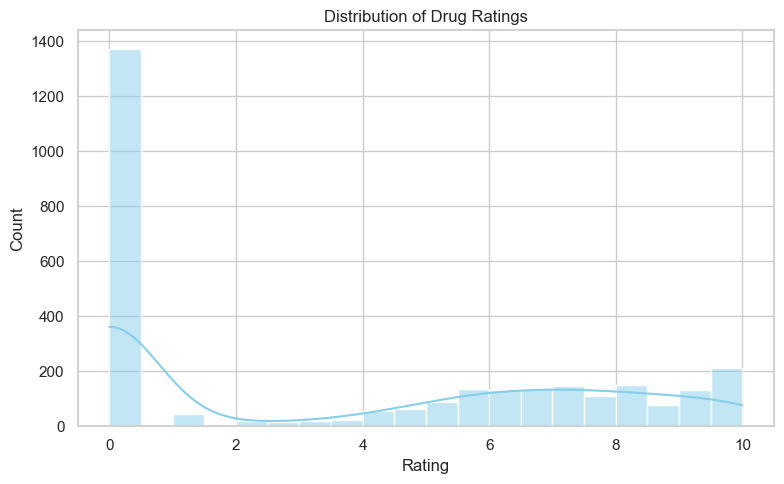

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\Manasa\AppData\Local\Temp\ipykernel_384\3291369846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, x='no_of_reviews', y='drug_name', palette='magma')


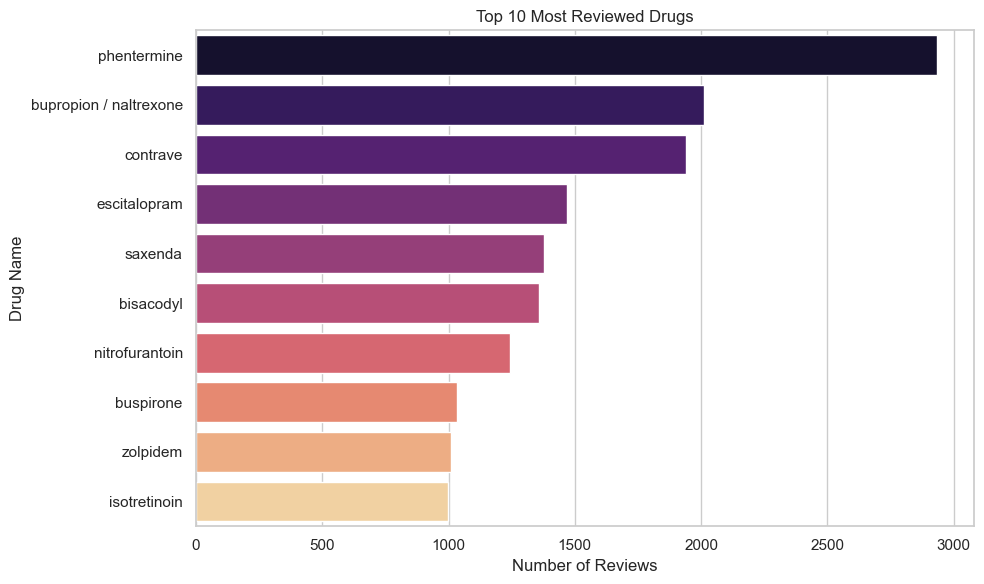

In [19]:
# Top 10 most reviewed drugs
top_reviews = df.sort_values(by='no_of_reviews', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_reviews, x='no_of_reviews', y='drug_name', palette='magma')
plt.title("Top 10 Most Reviewed Drugs")
plt.xlabel("Number of Reviews")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()

C:\Users\Manasa\AppData\Local\Temp\ipykernel_384\3321091491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='effectiveness', palette='Set2')


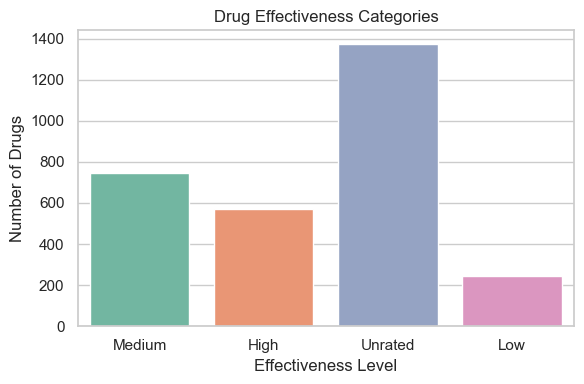

In [20]:
# Effectiveness category count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='effectiveness', palette='Set2')
plt.title("Drug Effectiveness Categories")
plt.xlabel("Effectiveness Level")
plt.ylabel("Number of Drugs")
plt.tight_layout()
plt.show()

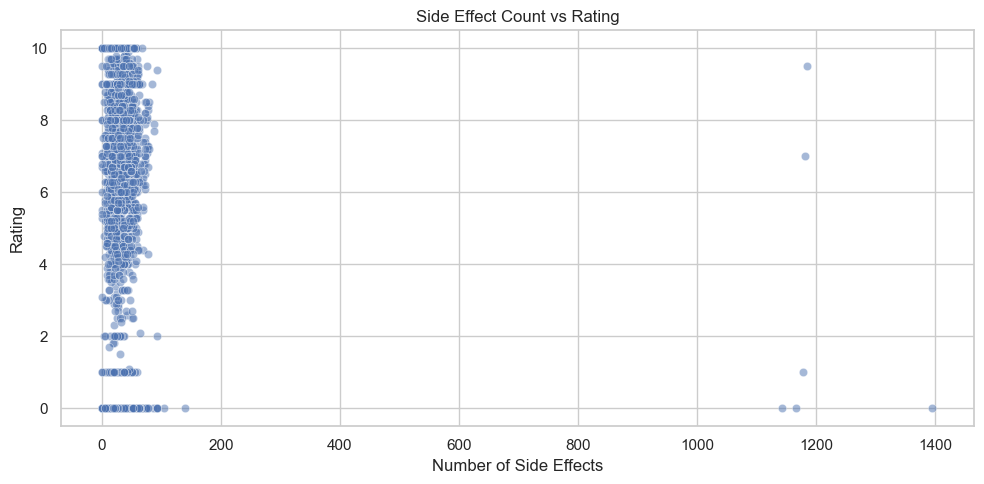

In [21]:
# Side effects vs rating
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='side_effect_count', y='rating', alpha=0.5)
plt.title("Side Effect Count vs Rating")
plt.xlabel("Number of Side Effects")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


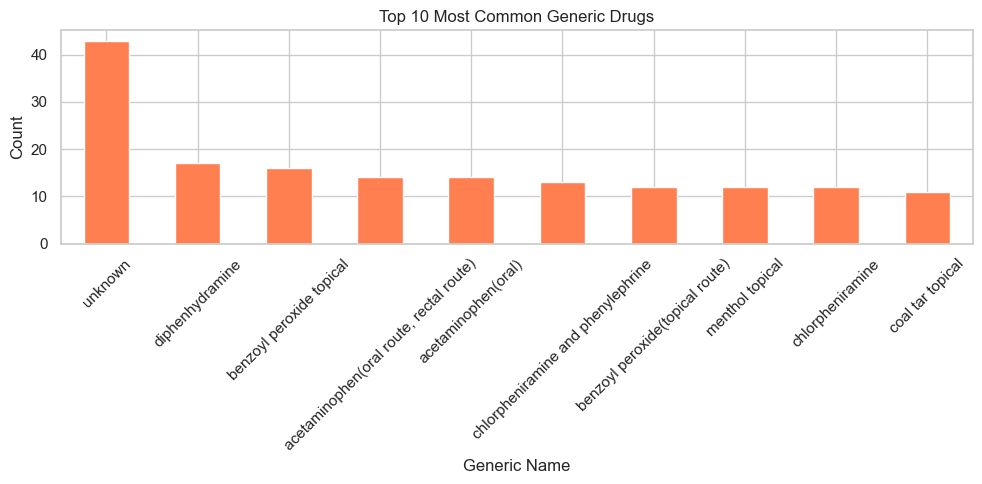

In [22]:
#Most Common Generic Names
top_generic = df['generic_name'].value_counts().head(10)

top_generic.plot(kind='bar', figsize=(10, 5), color='coral')
plt.title("Top 10 Most Common Generic Drugs")
plt.ylabel("Count")
plt.xlabel("Generic Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


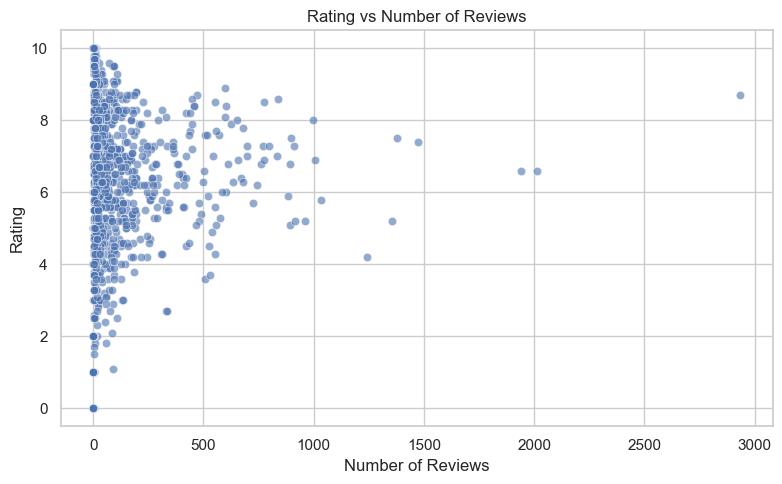

In [24]:
#Correlation Between Rating and Number of Reviews
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='no_of_reviews', y='rating', alpha=0.6)
plt.title("Rating vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


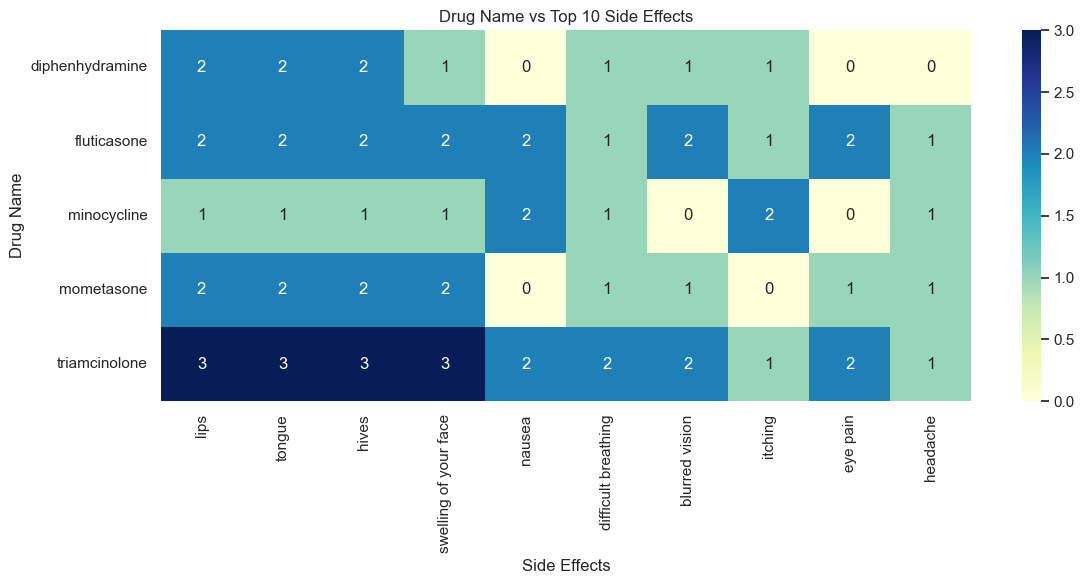

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Define top drugs (by number of reviews, or simply count)
top_drugs = df['drug_name'].value_counts().head(5).index.tolist()

# Step 2: Filter the DataFrame for these top drugs
top_df = df[df['drug_name'].isin(top_drugs)][['drug_name', 'side_effects']].copy()

# Step 3: Split side effects into lists
top_df['side_effects'] = top_df['side_effects'].apply(
    lambda x: [s.strip() for s in x.split(',') if s.strip() and s.lower() != 'unknown']
)

# Step 4: Convert list of side effects into binary features
mlb = MultiLabelBinarizer()
side_effect_matrix = pd.DataFrame(mlb.fit_transform(top_df['side_effects']), columns=mlb.classes_, index=top_df.index)
side_effect_matrix['drug_name'] = top_df['drug_name']

# Step 5: Group by drug name and count occurrence of each side effect
drug_se_heatmap = side_effect_matrix.groupby('drug_name').sum()

# Step 6: Plot only the top 10 most common side effects overall
top_side_effects = drug_se_heatmap.sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 6))
sns.heatmap(drug_se_heatmap[top_side_effects], annot=True, fmt='d', cmap='YlGnBu')
plt.title("Drug Name vs Top 10 Side Effects")
plt.xlabel("Side Effects")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()
